First 5 rows of the dataset:
   industrial_risk   management_risk   financial_flexibility   credibility  \
0              0.5               1.0                     0.0           0.0   
1              0.0               1.0                     0.0           0.0   
2              1.0               0.0                     0.0           0.0   
3              0.5               0.0                     0.0           0.5   
4              1.0               1.0                     0.0           0.0   

    competitiveness   operating_risk       class  
0               0.0              0.5  bankruptcy  
1               0.0              1.0  bankruptcy  
2               0.0              1.0  bankruptcy  
3               0.0              1.0  bankruptcy  
4               0.0              1.0  bankruptcy  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------             


Class balance after encoding:
 class
1    143
0    107
Name: count, dtype: int64

Class balance after SMOTE:
 class
0    143
1    143
Name: count, dtype: int64

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        30

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



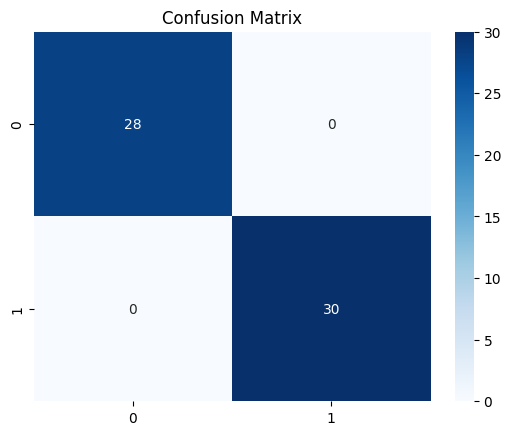

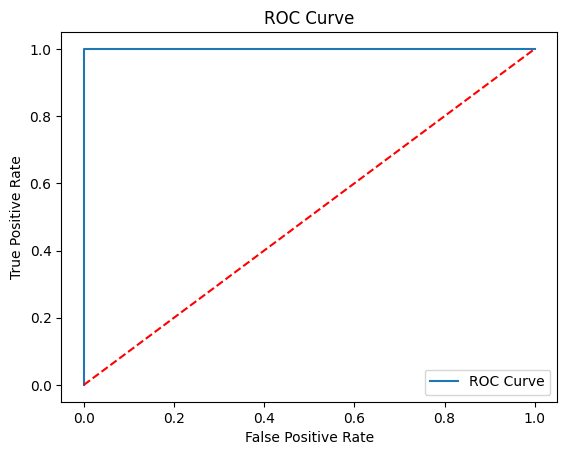

ROC AUC Score: 1.0
Model saved as bankruptcy_model.pkl


In [2]:
# bankruptcy_prevention.py

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

# For handling imbalance
from imblearn.over_sampling import SMOTE

# 2. Load dataset
# Replace with your actual file name
df = pd.read_csv('/content/Copy of bankruptcy-prevention.csv')

# 3. EDA
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nClass distribution:")
print(df[' class'].value_counts())

# Visualizing target distribution
sns.countplot(data=df, x=' class')
plt.title("Bankruptcy vs Non-Bankruptcy Count")
plt.show()

# 4. Preprocessing
# Encode target variable (bankruptcy -> 1, non-bankruptcy -> 0)
label_enc = LabelEncoder()
df[' class'] = label_enc.fit_transform(df[' class'])

# Separate features and target
X = df.drop(' class', axis=1)
y = df[' class']

# Check imbalance
print("\nClass balance after encoding:")
print(y.value_counts())

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("\nClass balance after SMOTE:")
print(y_res.value_counts())

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

# 6. Model training (Random Forest as example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 8. Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# 9. Save model
import joblib
joblib.dump(model, "bankruptcy_model.pkl")
print("Model saved as bankruptcy_model.pkl")